#### chatbot logs
https://chatgpt.com/share/66ff59d8-1bc4-800c-bc87-d120a11cfbbd

### 1

The standard deviation is a measure of the spread or variability in the original data. It quantifies how much individual data points deviate from the mean of the dataset. The standard error of the mean estimates the variability of the sample mean. It tells us how much the mean of the sample is expected to fluctuate if we repeatedly took samples from the same population.

### 2

We can calculate the nargin of error by multiplying the standard error of the mean by the critical value. The margin of error tells you how far away from the sample mean you can expect the true population mean to be, with 95% confidence. Then use he sample mean and the margin of error to create the confidence interval CI=(xˉ−MOE,xˉ+MOE)

### 3

First draw bootstrap samples from the original data by randomly sampling with replacement from the original dataset. This simulates repeated sampling from the population. Then compute the sample mean for each bootstrap sample. Finally build the distribution of bootstrap means and calculate the confidence interval.

### 4

95% Bootstrap Confidence Interval for the Mean: (55.49, 69.50)


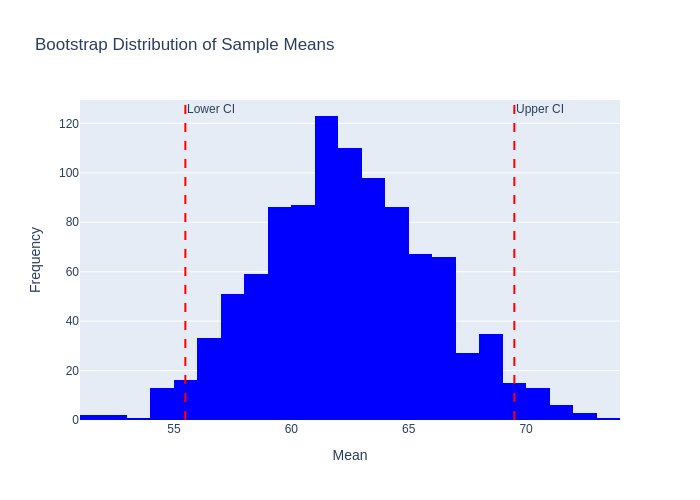

In [8]:
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio

# Set Plotly renderer to PNG
pio.renderers.default = 'png'

# Sample data (replace this with your own data)
data = np.array([55, 60, 45, 70, 65, 75, 50, 60, 85, 55])

# Function to generate bootstrap samples and compute statistics
def bootstrap(data, num_samples=1000, statistic=np.mean):
    """
    Generates bootstrap samples and computes the given statistic (e.g., mean, median) for each sample.
    
    Args:
    - data: Original data sample.
    - num_samples: Number of bootstrap samples to generate.
    - statistic: The statistic to compute for each bootstrap sample. Defaults to np.mean.
    
    Returns:
    - A list of computed statistics (e.g., means) for each bootstrap sample.
    """
    n = len(data)
    boot_stats = []

    # Generate bootstrap samples and calculate the statistic
    for _ in range(num_samples):
        boot_sample = np.random.choice(data, size=n, replace=True)
        stat = statistic(boot_sample)
        boot_stats.append(stat)
    
    return np.array(boot_stats)

# Number of bootstrap samples
num_samples = 1000

# Bootstrap sample means
boot_means = bootstrap(data, num_samples=num_samples, statistic=np.mean)

# Calculate 95% confidence interval
ci_lower = np.percentile(boot_means, 2.5)
ci_upper = np.percentile(boot_means, 97.5)
print(f"95% Bootstrap Confidence Interval for the Mean: ({ci_lower:.2f}, {ci_upper:.2f})")

# Plot the bootstrap distribution
fig = go.Figure()

# Histogram of the bootstrap means
fig.add_trace(go.Histogram(x=boot_means, nbinsx=30, marker_color='blue'))

# Add the confidence interval as vertical lines
fig.add_vline(x=ci_lower, line_width=2, line_dash='dash', line_color='red', annotation_text='Lower CI')
fig.add_vline(x=ci_upper, line_width=2, line_dash='dash', line_color='red', annotation_text='Upper CI')

# Add labels and title
fig.update_layout(
    title='Bootstrap Distribution of Sample Means',
    xaxis_title='Mean',
    yaxis_title='Frequency',
    showlegend=False
)

# Render plot as PNG
fig.show(renderer = "png")

# ----
# To modify this code for different population parameters:
# ----

# 1. For a 95% confidence interval for the **median**, change the statistic argument:
#    boot_medians = bootstrap(data, num_samples=num_samples, statistic=np.median)

# 2. For a confidence interval for **variance**, use np.var:
#    boot_variances = bootstrap(data, num_samples=num_samples, statistic=np.var)

# 3. You can replace the statistic argument with any function that computes a sample statistic.
#    For example, if you want the confidence interval for the standard deviation, 
#    you can define a custom function: 
#    def sample_std(sample): return np.std(sample)
#    boot_stds = bootstrap(data, num_samples=num_samples, statistic=sample_std)

# Modify plot labels as necessary for other parameters!


### 5

Distinguishing between the population parameter and the sample statistic is critical because the sample statistic is the basis for constructing the CI, while the population parameter is the target of the CI. Confidence intervals account for the randomness and variability of sample statistics in estimating the population parameter, helping us quantify our uncertainty about where the true population parameter might lie.

### 6

Bootstrapping lets you simulate having more samples to work with by reusing the data you already have.
The main reason we use bootstrapping is that it helps us estimate uncertainty in our data.
Bootstrapping lets you see how “consistent” your sample data is with your guess about the population average. If the bootstrapped data frequently comes close to your guess, your guess might be pretty good; otherwise, it might not be.

### 7

Failing to reject the null hypothesis occurs when the confidence interval includes zero, meaning the population parameter could be zero, so there is insufficient evidence to conclude that the population mean is different from zero.
Rejecting the null hypothesis occurs when the confidence interval does not include zero, meaning zero is not a plausible value for the population mean, and thus, there is sufficient evidence to conclude that the population mean is different from zero.

### 9

yes